# Preprocessing from sql json to timeseries csv

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

Json-fil: dimension.json med tabellen SCDAT.A_PRICES fån Dimension

{"price_date":"2003-12-31","price":224.48,"price_type":"Index","quotation":"Price","sec_ref":503415,"sec_no":"85000075","sec_short_name":"AK_SV"}
,{"price_date":"2004-01-30","price":238.87,"price_type":"Index","quotation":"Price","sec_ref":503415,"sec_no":"85000075","sec_short_name":"AK_SV"}
,{"price_date":"2004-02-27","price":250.56,"price_type":"Index","quotation":"Price","sec_ref":503415,"sec_no":"85000075","sec_short_name":"AK_SV"}

Läs in till DataFrame

In [2]:
with open('./data/dimension.json') as datafile:
    data = json.load(datafile)
index_raw = pd.DataFrame(data)

In [3]:
index_raw.head()

,price_date,price,price_type,quotation,sec_ref,sec_no,sec_short_name
0,2003-12-31,224.48,Index,Price,503415,85000075,AK_SV
1,2004-01-30,238.87,Index,Price,503415,85000075,AK_SV
2,2004-02-27,250.56,Index,Price,503415,85000075,AK_SV
3,2004-03-31,248.29,Index,Price,503415,85000075,AK_SV
4,2004-04-30,251.56,Index,Price,503415,85000075,AK_SV


In [4]:
index_df = index_raw.pivot(index='price_date', columns='sec_short_name', values='price')
index_df.index = pd.to_datetime(index_df.index)
index_df.sort_index(inplace=True)

In [5]:
index_df.head()

sec_short_name,AK_SV,AK_WORLD,AK_WORLD_LOC,ALTERNATIVA,CPI,FASTIGHETER,KRED_SV,RB_SV_15,RB_SV_1_RATE,RB_SV_5,RB_UTL,SPREAD
price_date,,,,,,,,,,,,
2003-12-15,NaN,NaN,NaN,NaN,278.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,224.48,4041.233665,591.744572,100.000000,NaN,100.4,196.46,0.048920,0.029400,0.03988,329.8108,0.00379
2004-01-15,NaN,NaN,NaN,NaN,278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-30,238.87,4241.075265,603.376160,100.812146,NaN,100.9,197.80,0.048141,0.027374,0.04050,331.7002,0.00400
2004-02-15,NaN,NaN,NaN,NaN,277.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


KPI släpar efter 15 dagar

In [6]:
index_df.fillna(method='backfill', axis=0, inplace=True)

In [7]:
index_df.head()

sec_short_name,AK_SV,AK_WORLD,AK_WORLD_LOC,ALTERNATIVA,CPI,FASTIGHETER,KRED_SV,RB_SV_15,RB_SV_1_RATE,RB_SV_5,RB_UTL,SPREAD
price_date,,,,,,,,,,,,
2003-12-15,224.48,4041.233665,591.744572,100.000000,278.6,100.4,196.46,0.048920,0.029400,0.03988,329.8108,0.00379
2003-12-31,224.48,4041.233665,591.744572,100.000000,278.0,100.4,196.46,0.048920,0.029400,0.03988,329.8108,0.00379
2004-01-15,238.87,4241.075265,603.376160,100.812146,278.0,100.9,197.80,0.048141,0.027374,0.04050,331.7002,0.00400
2004-01-30,238.87,4241.075265,603.376160,100.812146,277.3,100.9,197.80,0.048141,0.027374,0.04050,331.7002,0.00400
2004-02-15,250.56,4341.993088,615.424353,101.725526,277.3,101.4,199.80,0.046236,0.025854,0.03755,335.1980,0.00270


Remove CPI midmonth

In [8]:
index_df.drop([date for date in index_df.index if date.day==15], inplace=True)

In [9]:
index_df.head()

sec_short_name,AK_SV,AK_WORLD,AK_WORLD_LOC,ALTERNATIVA,CPI,FASTIGHETER,KRED_SV,RB_SV_15,RB_SV_1_RATE,RB_SV_5,RB_UTL,SPREAD
price_date,,,,,,,,,,,,
2003-12-31,224.48,4041.233665,591.744572,100.000000,278.0,100.40,196.46,0.048920,0.029400,0.03988,329.8108,0.00379
2004-01-30,238.87,4241.075265,603.376160,100.812146,277.3,100.90,197.80,0.048141,0.027374,0.04050,331.7002,0.00400
2004-02-27,250.56,4341.993088,615.424353,101.725526,279.4,101.40,199.80,0.046236,0.025854,0.03755,335.1980,0.00270
2004-03-31,248.29,4375.960151,610.441767,102.640223,279.4,101.91,202.26,0.046868,0.022710,0.03415,336.7678,0.00290
2004-04-30,251.56,4331.790677,606.675665,101.088818,280.1,102.41,200.78,0.049752,0.024333,0.03875,332.0747,0.00320


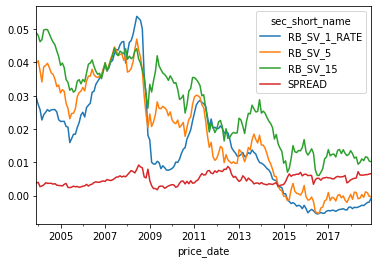

In [10]:
index_df[['RB_SV_1_RATE', 'RB_SV_5', 'RB_SV_15', 'SPREAD']].plot()

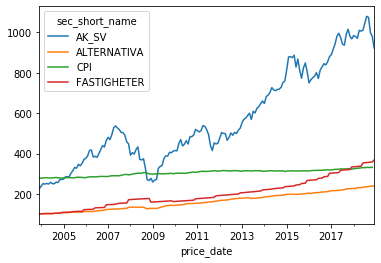

In [11]:
index_df[['AK_SV', 'ALTERNATIVA', 'CPI', 'FASTIGHETER']].plot()

### Save as csv

In [15]:
index_df.to_csv('./data/index.csv')